# Diamonds

In [1]:
#Librerias que son importantes DIAMONDS
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#from mpl_toolkits import mplot3d

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
##Obtener tabla diamonds
diamonds = sns.load_dataset('diamonds')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Codificacion de variables

In [5]:
# COLOR
color_map = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
diamonds['color'] = diamonds['color'].map(color_map)

In [6]:
# CUT
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds['cut'] = diamonds['cut'].map(cut_map)

In [7]:
# Clarity
clarity_map = {'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}
diamonds['clarity'] = diamonds['clarity'].map(clarity_map)

In [8]:
print(diamonds['color'].describe())
print(diamonds['cut'].describe())
print(diamonds['clarity'].describe())

count     53940
unique        7
top           4
freq      11292
Name: color, dtype: int64
count     53940
unique        5
top           5
freq      21551
Name: cut, dtype: int64
count     53940
unique        8
top           2
freq      13065
Name: clarity, dtype: int64


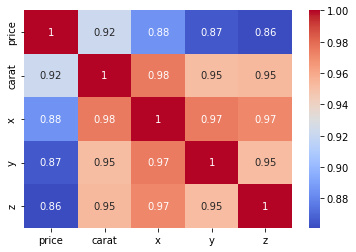

In [26]:
corr = diamonds[['price', 'carat', 'x', 'y', 'z']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

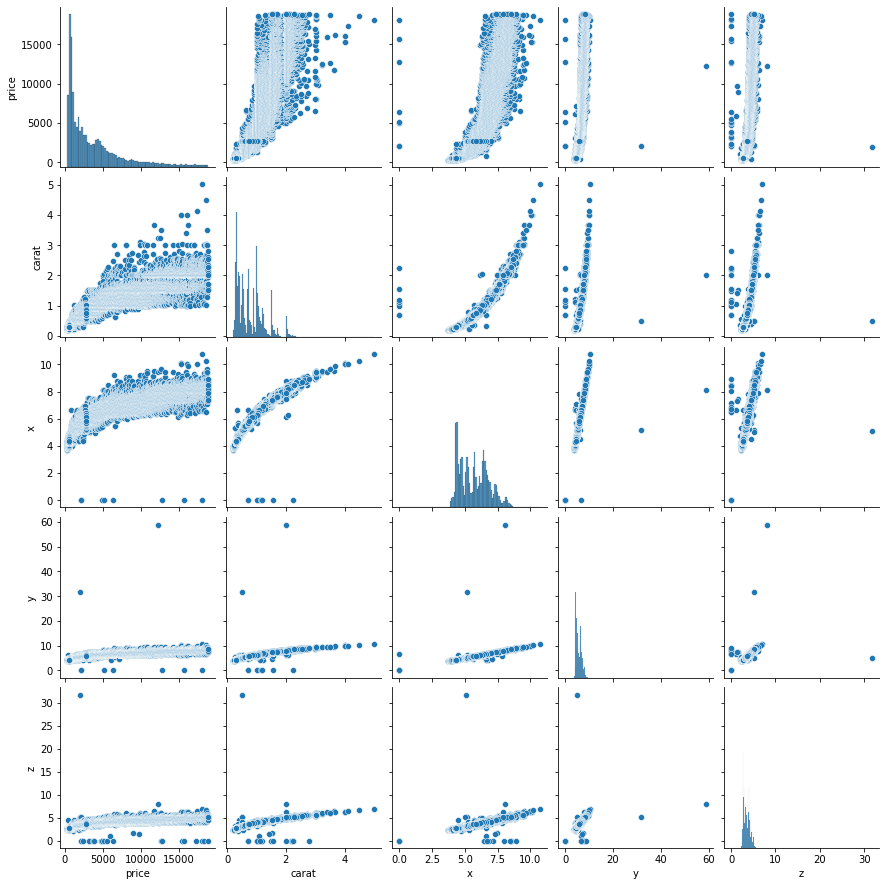

In [10]:
sns.pairplot(diamonds[['price', 'carat', 'x', 'y', 'z']])
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
modelo = diamonds[["price", "carat"]]

In [13]:
import numpy as np

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#PCA
variables = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color', 'cut', 'clarity']

In [15]:
scaler = StandardScaler()
diamantes_scaled = scaler.fit_transform(diamonds[variables])

In [28]:
variables = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'color', 'cut', 'clarity']
scaler = StandardScaler()
diamantes_scaled = scaler.fit_transform(diamonds[variables])
pca = PCA(n_components=2)
diamantes_pca = pca.fit_transform(diamantes_scaled)
diamantes_pca_df = pd.DataFrame(data=diamantes_pca, columns=['Componente 1', 'Componente 2'])
print('Varianza por cada componente principal:', pca.explained_variance_ratio_)

Varianza por cada componente principal: [0.4961529 0.1433671]


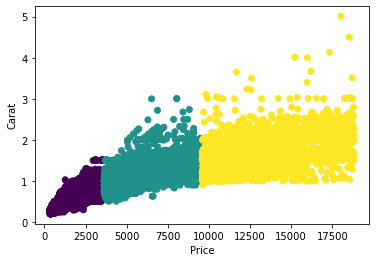

In [29]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(modelo)
plt.scatter(modelo["price"], modelo["carat"], c=kmeans.labels_.astype(float))
plt.xlabel("Price")
plt.ylabel("Carat")
plt.show()

In [30]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cluster
0,0.23,5,6,3,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,4,6,2,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,2,6,4,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,4,2,5,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,2,1,3,63.3,58.0,335,4.34,4.35,2.75,1


In [37]:
var = ['price', 'carat', 'x', 'y', 'z']
diamantes_vars = diamonds[var]
scaler = StandardScaler()
diamantes_vars_scaled = scaler.fit_transform(diamantes_vars)

In [38]:
scaler = StandardScaler()
diamantes_vars_scaled = scaler.fit_transform(diamantes_vars)

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(diamantes_vars_scaled);

In [40]:
diamonds['cluster'] = kmeans.labels_

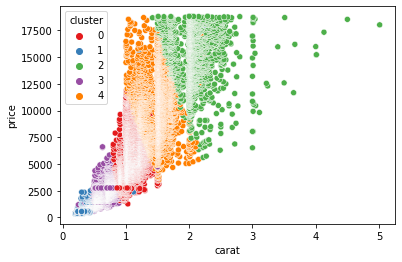

In [41]:
# Grafico de los segmentos
sns.scatterplot(data=diamonds, x='carat', y='price', hue='cluster', palette='Set1')
plt.show()

# Segmentacion de datos

In [45]:
var = ['price', 'carat', 'x', 'y', 'z']
diamantes_vars = diamonds[var]
scaler = StandardScaler()
diamantes_vars_scaled = scaler.fit_transform(diamantes_vars)
inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(diamantes_vars_scaled)
    inercia.append(kmeans.inertia_)
plt.plot(range(1, 11), inercia, marker='o')
plt.xlabel('# de clusters')
plt.ylabel('Inercia')
plt.show();

AttributeError: 'NoneType' object has no attribute 'split'

In [46]:
#No se porque me da error pero la logica esta bien